# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [2]:
df_data = pd.read_csv('Example_bank_data.csv', index_col=False)

    We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [3]:
df_data = df_data.drop('Unnamed: 0', axis =1)

In [4]:
df_data['y'] = df_data['y'].map({'yes':1 , 'no':0})

In [ ]:
df_data

### Declare the dependent and independent variables

In [5]:
x1 = df_data.duration
y = df_data.y

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [6]:
X = sm.add_constant(x1)
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [7]:
y_hat =log_reg.predict(X)

In [8]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                  0.2121
Time:                        21:50:00   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [12]:
log_reg.pred_table()

array([[204.,  55.],
       [104., 155.]])

In [9]:
df_data['y_hat']=y_hat

In [10]:
df_data

,duration,y,y_hat
0,117,0,0.249369
1,274,1,0.425713
2,167,0,0.300195
3,686,1,0.858983
4,157,0,0.289566
...,...,...,...
513,204,0,0.341365
514,806,1,0.918365
515,290,0,0.445822
516,473,1,0.672160


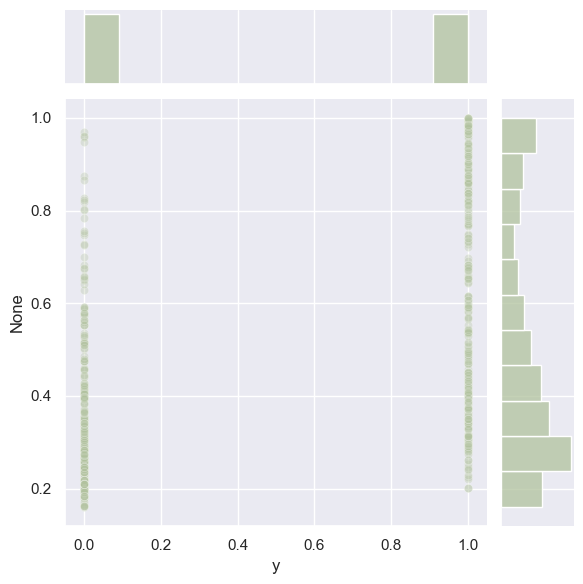

In [11]:
with sns.axes_style('darkgrid'):
    sns.jointplot(x=y,
                  y=y_hat,
                  kind='scatter',
                  color ="#B1C29E",
                 joint_kws={'alpha':0.3})
plt.show()